In [1]:
import importlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm

from Utils import paths
from Utils import transformation_utils as t_utils

importlib.reload(paths)
COLORS = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [2]:
fhr = pd.read_pickle(f"{paths.CLEAN_DATA_PATH}/fhr.pickle")
y = pd.read_pickle(f"{paths.CLEAN_DATA_PATH}/y.pickle")

fhr.shape, y.shape

((552, 21620), (552,))

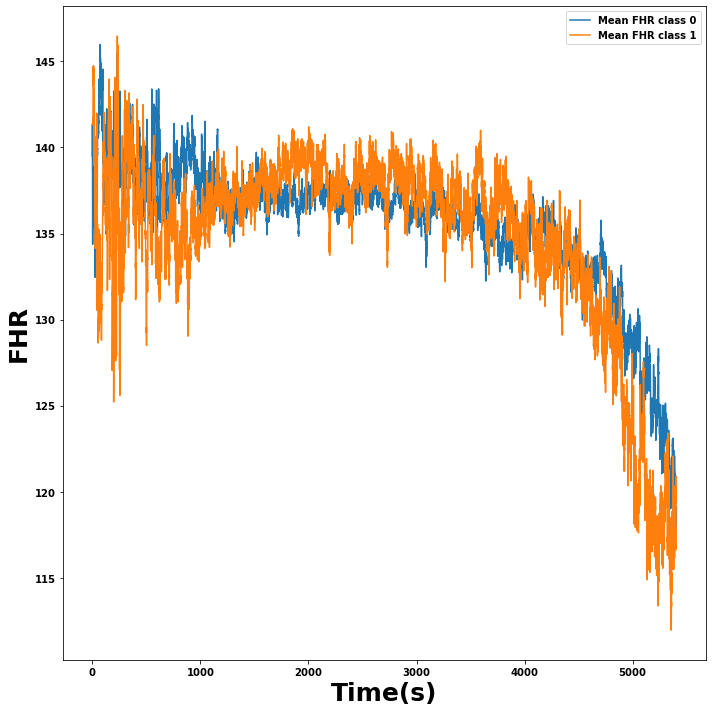

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

ax.plot(fhr[y == 0].mean().index, fhr[y == 0].mean().values, label='Mean FHR class 0')
ax.plot(fhr[y == 1].mean().index, fhr[y == 1].mean().values, label='Mean FHR class 1')

ax.set_xlabel('Time(s)', fontsize=25)
ax.set_ylabel('FHR', fontsize=25)
ax.legend()
fig.tight_layout()

In [8]:
# Remove curves dismissed for other datasets

dismissed = [1104, 1119, 1134, 1149, 1155, 1158, 1186, 1188, 1258, 1292, 1322,
 1327, 1451, 1477, 1482, 2003]

fhr = fhr.drop(dismissed, errors='ignore')
y = y.drop(dismissed, errors='ignore')

In [5]:
fft_data = dict()
freqs = t_utils.get_freqs(fhr.shape[-1])

for idx_fhr, fhr_row in tqdm(fhr.copy().iterrows(), total=len(fhr)):
    fhr_signal = fhr_row.values

    fft_data[idx_fhr] = t_utils.nan_save_fft(fhr_signal, freqs)
# 536/536 [20:08<00:00, 2.68s/it]

  0%|          | 0/536 [00:00<?, ?it/s]

In [5]:
fft_df = pd.DataFrame(fft_data).T
fft_df.columns = freqs
fft_df = fft_df.loc[:, freqs <= 0.1]
fft_df = fft_df.iloc[:, 1:]
fft_df

,0.000185,0.000370,0.000555,0.000740,0.000925,0.001110,0.001295,0.001480,0.001665,0.001850,...,0.098242,0.098427,0.098612,0.098797,0.098982,0.099167,0.099352,0.099537,0.099722,0.099907
1001,6.952497e+05,446818.140600,428764.789133,131342.818035,63500.016257,188688.579360,162030.800120,93410.187650,23648.215375,61318.704643,...,8169.303814,12606.214789,16516.252043,21757.672538,2149.114559,23723.087400,16773.537565,21729.025938,37413.874209,26112.753157
1002,7.564144e+05,420993.564297,228093.361924,367628.541226,316551.464603,59884.646611,165404.210297,24344.341266,27669.017068,153230.973276,...,20300.604747,18131.218788,15308.336792,24228.682040,19945.027301,13168.319298,8446.206134,12962.717254,12127.262801,16591.718587
1003,7.855275e+05,380336.134876,672167.943326,449903.237109,372471.492101,142409.392588,35295.210275,119387.158496,102855.604442,65969.044909,...,5527.056870,9437.496038,7364.281425,11188.066864,7480.969788,9602.741490,3423.256223,9843.431465,10271.469361,6476.379852
1004,8.460664e+05,647755.023024,287123.542519,91436.406934,142319.694893,128428.327263,138427.207737,67766.574595,45582.756570,73802.914533,...,3005.951575,3640.903544,1194.597730,1975.434320,2746.183175,2457.943941,1270.524755,656.285091,1597.290810,1812.433137
1005,9.892601e+05,539365.414727,80580.461556,122561.687447,216241.769749,185922.620633,58610.383669,107677.337489,187617.522019,63404.422816,...,23445.906317,18857.814708,6254.031696,19501.097850,6394.706805,15407.872449,5895.693264,21997.771557,8787.444150,18517.452077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2042,1.113381e+06,583339.219323,34863.576885,304637.367072,238602.887594,38188.515685,176367.628728,151442.274934,43097.481274,126291.141105,...,7780.356365,2893.632444,1620.945887,3334.664223,3285.460752,4247.097505,3438.509811,6947.748183,9955.652788,10631.677496
2043,6.354950e+05,550823.726334,418518.851728,260158.286454,309211.328105,181059.616083,121957.114262,187818.661390,37404.570670,253064.639584,...,14337.236895,4607.442143,9173.857815,8823.195893,15249.646648,11056.069116,1672.288258,4081.077702,12735.470130,9403.181577
2044,1.353436e+06,724303.812845,57644.239917,363790.725783,290057.641381,33268.903643,215035.739114,147605.482310,30046.118843,131281.026743,...,3591.598836,2793.073099,2734.294538,2598.577669,4482.027638,361.447820,2296.427635,6908.955743,2428.634050,8209.963495
2045,1.128119e+06,475969.046214,286972.840062,508415.058278,408128.374583,226329.990086,201665.375829,58677.725568,156770.694236,114602.439282,...,4061.860137,3853.740527,3740.732802,5969.087631,6014.318257,7284.575663,1631.543251,1688.587120,5800.980207,3239.306574


In [9]:
tt = np.array(freqs)[freqs <= 0.1][1:]

fft_0 = fft_df.copy()[y == 0]
mean_0 = fft_0.mean().values
std_0 = fft_0.std().values
max_0 = fft_0.max().values
min_0 = fft_0.min().values

fft_1 = fft_df.copy()[y == 1]
mean_1 = fft_1.mean().values
std_1 = fft_1.std().values
max_1 = fft_1.max().values
min_1 = fft_1.min().values

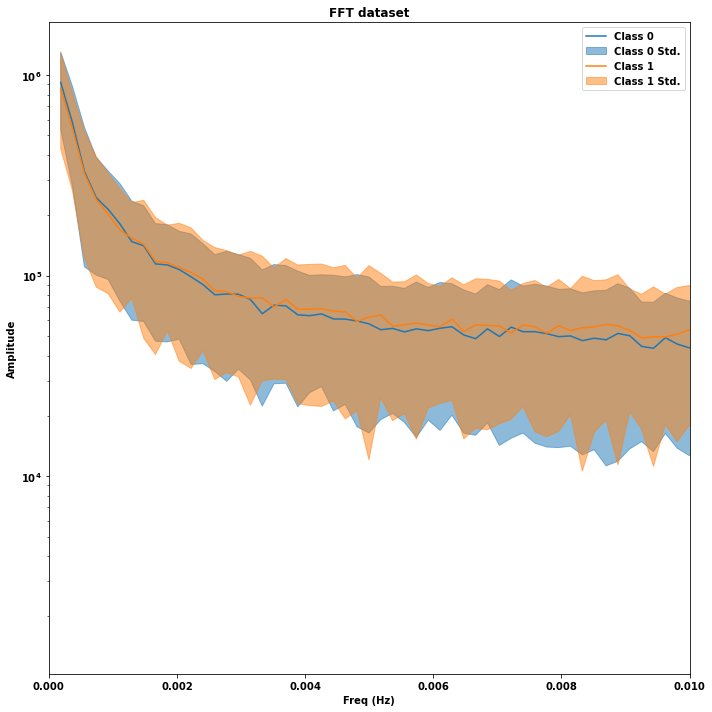

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax.plot(tt, mean_0, label='Class 0', color=COLORS[0])
ax.fill_between(tt, mean_0 - std_0, mean_0 + std_0, label='Class 0 Std.', alpha=0.5, color=COLORS[0])

ax.plot(tt, mean_1, label='Class 1', color=COLORS[1])
ax.fill_between(tt, mean_1 - std_1, mean_1 + std_1, label='Class 1 Std.', alpha=0.5, color=COLORS[1])

ax.set_yscale('log')

ax.legend(loc='best')
ax.set_title(f"FFT dataset")
ax.set_ylabel(f"Amplitude")
ax.set_xlabel("Freq (Hz)")
ax.set_xlim((0,0.01))
fig.tight_layout()

plt.savefig(f"{paths.FFT_DATA_PLOTS}/Desc_plot.png")
plt.savefig(f"{paths.FFT_DATA_PLOTS}/Desc_plot.pdf")

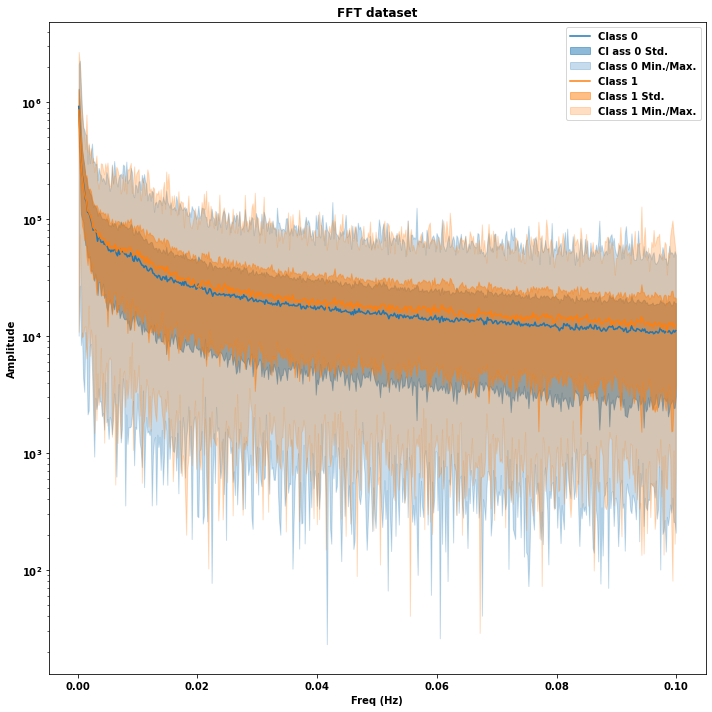

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax.plot(tt, mean_0, label='Class 0', color=COLORS[0])
ax.fill_between(tt, mean_0 - std_0, mean_0 + std_0, label='Cl ass 0 Std.', alpha=0.5, color=COLORS[0])
ax.fill_between(tt, min_0, max_0, label='Class 0 Min./Max.', alpha=0.25, color=COLORS[0])

ax.plot(tt, mean_1, label='Class 1', color=COLORS[1])
ax.fill_between(tt, mean_1 - std_1, mean_1 + std_1, label='Class 1 Std.', alpha=0.5, color=COLORS[1])
ax.fill_between(tt, min_1, max_1, label='Class 1 Min./Max.', alpha=0.25, color=COLORS[1])

ax.set_yscale('log')

ax.legend(loc='best')
ax.set_title(f"FFT dataset")
ax.set_ylabel(f"Amplitude")
ax.set_xlabel("Freq (Hz)")
fig.tight_layout()

plt.savefig(f"{paths.FFT_DATA_PLOTS}/Desc_plot_Mm.png")
plt.savefig(f"{paths.FFT_DATA_PLOTS}/Desc_plot_Mm.pdf")

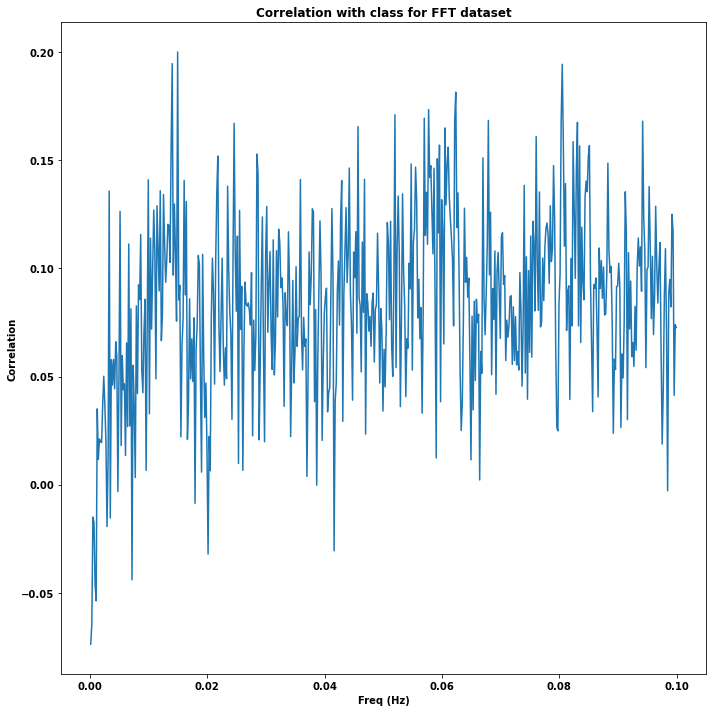

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

fft_df.corrwith(y).plot(ax=ax)

ax.set_ylabel('Correlation')
ax.set_xlabel('Freq (Hz)')
ax.set_title(f'Correlation with class for FFT dataset')
fig.tight_layout()

plt.savefig(f"{paths.FFT_DATA_PLOTS}/Class_correlation.png")
plt.savefig(f"{paths.FFT_DATA_PLOTS}/Class_correlation.pdf")

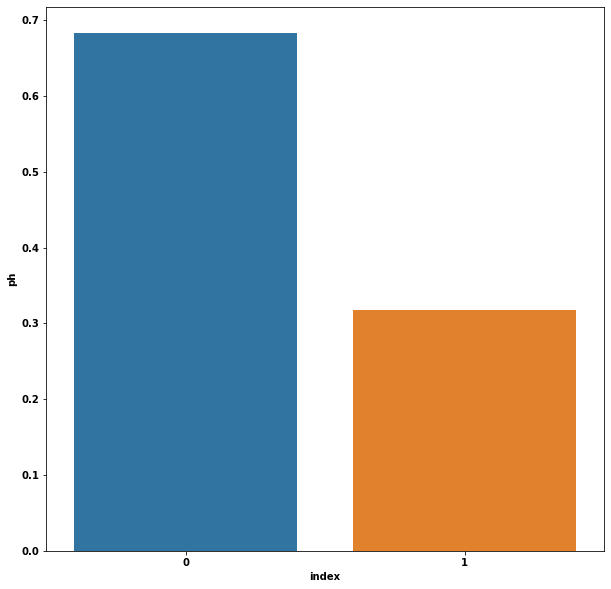

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.barplot(x='index', y='ph', data=pd.DataFrame(y.value_counts(normalize=True)).reset_index())
plt.savefig(f"{paths.FFT_DATA_PLOTS}/Class_Distribution.png")
plt.savefig(f"{paths.FFT_DATA_PLOTS}/Class_Distribution.pdf")

In [15]:
fft_df['patologico'] = y

In [16]:
fft_df.to_csv(f"{paths.FFT_DATA_PATH}/fft_dataset.csv")

In [17]:
X = fft_df.iloc[:, :-1]
X.to_pickle(f"{paths.FFT_DATA_PATH}/X.pickle")
y.to_pickle(f"{paths.FFT_DATA_PATH}/y.pickle")
